<u><h1><CENTER> ML-DEC-MAJOR PROJECT

We will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

Size of training set: 6,019 records

Size of test set: 1,234 records

<b>FEATURES</b>:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

<b><h3>IMPORTING TRAIN AND TEST DATA

In [6]:
import pandas
df1 = pandas.read_excel('Data_Train.xlsx')
print("TRAIN DATA:")
df1

TRAIN DATA:


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [7]:
d = pandas.read_excel('Data_Test.xlsx')
print("TEST DATA:")
d

TEST DATA:


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


<B><H3>DATA PROCESSING

<ul>
    <li>Extracting only the numeric part of the string in columns Mileage,Engine and Power.
    <li>Dropping the column New_Price
    <li>Converting the Name column into Brands.
    <li>Concatinating the train and test data into a single dataframe.
    <li>Dropping Nan values
    <li>Label encoding columns Name,Location,Fuel_Type,Transmission and Owner_Type.
    <li>Separating train and test data.
    <li>Dropping the column Price in test data as it's empty.
    <li>Resetting index of test data.
    <li>Dropping "null" values of Power column of train and test data.
    <li>Converting string type to float of columns Mileage,Engine and Power. 

<b>Extracting only the numeric part of the string:

In [8]:
import re
pattern = re.compile('^(\\S*)\\s')

In [9]:
new=df1['Mileage'].str.extract(pattern)
df1['Mileage'] = new
new=df1['Engine'].str.extract(pattern)
df1['Engine'] = new
new=df1['Power'].str.extract(pattern)
df1['Power'] = new

In [10]:
new=d['Mileage'].str.extract(pattern)
d['Mileage'] = new
new=d['Engine'].str.extract(pattern)
d['Engine'] = new
new=d['Power'].str.extract(pattern)
d['Power'] = new

In [11]:
d

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN


In [12]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,NaN,2.65


<b>Dropping the column New_Price:

In [13]:
df1=df1.drop(['New_Price'],axis=1)
d=d.drop(['New_Price'],axis=1)

In [14]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [15]:
d

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0


<b>Converting the Name column into Brands:

In [16]:
x = pandas.DataFrame(d['Name'])
y = x['Name'].str.split()
k=list()
for i in y:
    k.append(i[0])
new = pandas.Series(k)
d['Name'] = new


In [17]:
x = pandas.DataFrame(df1['Name'])
y = x['Name'].str.split()
k=list()
for i in y:
    k.append(i[0])
new = pandas.Series(k)
df1['Name'] = new

In [18]:
d

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0
1230,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0
1231,Nissan,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0
1232,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0


In [19]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


<b>Dropping Nan values:

In [20]:
d=d.dropna()
df1=df1.dropna()

In [21]:
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,2.65


In [22]:
d

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0
1230,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0
1231,Nissan,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0
1232,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0


In [23]:
d.shape

(1223, 11)

In [24]:
df1.shape

(5975, 12)

In [25]:
print("Train data Brands : ",df1['Name'].unique())
print("Test data Brands : ",d['Name'].unique())
print("Train data Location :",df1['Location'].unique())
print("Test data Location :",d['Location'].unique())
print("Train data Fuel type :",df1['Fuel_Type'].unique())
print("Test data Fuel type :",d['Fuel_Type'].unique())
print("Train data Transmission :",df1['Transmission'].unique())
print("Test data Transmission :",d['Transmission'].unique())
print("Train data Owner type :",df1['Owner_Type'].unique())
print("Test data Owner type :",d['Owner_Type'].unique())

Train data Brands :  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
Test data Brands :  ['Maruti' 'Toyota' 'Hyundai' 'Mahindra' 'Honda' 'Audi' 'Nissan' 'BMW'
 'Ford' 'Skoda' 'Volkswagen' 'Mitsubishi' 'Mercedes-Benz' 'Tata'
 'Chevrolet' 'Datsun' 'Jaguar' 'Fiat' 'Hindustan' 'Renault' 'Mini'
 'Bentley' 'Land' 'Volvo' 'Isuzu' 'Jeep' 'Porsche' 'ISUZU' 'OpelCorsa']
Train data Location : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Test data Location : ['Delhi' 'Coimbatore' 'Mumbai' 'Hyderabad' 'Pune' 'Jaipur' 'Chennai'
 'Kochi' 'Bangalore' 'Kolkata' 'Ahmedabad']
Train data Fuel type : ['CNG' 'Diesel' 'Petrol' 'LPG']
Test data Fuel type : ['CNG' 'Petrol' 'Diesel' 'LPG']
Train data Tr

<b>Concatinating the train and test data into a single dataframe:

In [26]:
result = pandas.concat([df1, d], ignore_index=True, sort=False)

In [27]:
result

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7193,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN
7194,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN
7195,Nissan,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN
7196,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN


<b>Label Encoding:

In [28]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
result['Fuel_Type']= label_encoder.fit_transform(result['Fuel_Type']) 
result['Transmission']= label_encoder.fit_transform(result['Transmission']) 
result['Owner_Type']= label_encoder.fit_transform(result['Owner_Type']) 
result['Name']= label_encoder.fit_transform(result['Name']) 
result['Location']= label_encoder.fit_transform(result['Location']) 

In [29]:
result

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,19,9,2010,72000,0,1,0,26.6,998,58.16,5.0,1.75
1,11,10,2015,41000,1,1,0,19.67,1582,126.2,5.0,12.50
2,10,2,2011,46000,3,1,0,18.2,1199,88.7,5.0,4.50
3,19,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,1,3,2013,40670,1,0,2,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7193,31,5,2011,89411,1,1,0,20.54,1598,103.6,5.0,NaN
7194,31,9,2015,59000,3,0,0,17.21,1197,103.6,5.0,NaN
7195,23,8,2012,28000,1,1,0,23.08,1461,63.1,5.0,NaN
7196,31,10,2013,52262,3,0,3,17.2,1197,103.6,5.0,NaN


<b>Separating train and test data:

In [30]:
a = result.iloc[:5975, :]
b = result.iloc[5975:, :]

In [31]:
a

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,19,9,2010,72000,0,1,0,26.6,998,58.16,5.0,1.75
1,11,10,2015,41000,1,1,0,19.67,1582,126.2,5.0,12.50
2,10,2,2011,46000,3,1,0,18.2,1199,88.7,5.0,4.50
3,19,2,2012,87000,1,1,0,20.77,1248,88.76,7.0,6.00
4,1,3,2013,40670,1,0,2,15.2,1968,140.8,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,19,4,2014,27365,1,1,0,28.4,1248,74,5.0,4.75
5971,11,6,2015,100000,1,1,0,24.4,1120,71,5.0,4.00
5972,18,6,2012,55000,1,1,2,14.0,2498,112,8.0,2.90
5973,19,8,2013,46000,3,1,0,18.9,998,67.1,5.0,2.65


In [32]:
b

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5975,19,4,2014,40929,0,1,0,32.26,998,58.2,4.0,NaN
5976,19,3,2013,54493,3,1,2,24.7,796,47.3,5.0,NaN
5977,30,9,2017,34000,1,1,0,13.68,2393,147.8,7.0,NaN
5978,30,5,2012,139000,1,1,0,23.59,1364,null,5.0,NaN
5979,11,9,2014,29000,3,1,0,18.5,1197,82.85,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7193,31,5,2011,89411,1,1,0,20.54,1598,103.6,5.0,NaN
7194,31,9,2015,59000,3,0,0,17.21,1197,103.6,5.0,NaN
7195,23,8,2012,28000,1,1,0,23.08,1461,63.1,5.0,NaN
7196,31,10,2013,52262,3,0,3,17.2,1197,103.6,5.0,NaN


<b>Dropping Price column of test data:

In [33]:
b=b.drop(['Price'],axis = 1)

In [34]:
b

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
5975,19,4,2014,40929,0,1,0,32.26,998,58.2,4.0
5976,19,3,2013,54493,3,1,2,24.7,796,47.3,5.0
5977,30,9,2017,34000,1,1,0,13.68,2393,147.8,7.0
5978,30,5,2012,139000,1,1,0,23.59,1364,null,5.0
5979,11,9,2014,29000,3,1,0,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7193,31,5,2011,89411,1,1,0,20.54,1598,103.6,5.0
7194,31,9,2015,59000,3,0,0,17.21,1197,103.6,5.0
7195,23,8,2012,28000,1,1,0,23.08,1461,63.1,5.0
7196,31,10,2013,52262,3,0,3,17.2,1197,103.6,5.0


<b>Resetting index in test data:

In [35]:
b.reset_index(drop = True)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,19,4,2014,40929,0,1,0,32.26,998,58.2,4.0
1,19,3,2013,54493,3,1,2,24.7,796,47.3,5.0
2,30,9,2017,34000,1,1,0,13.68,2393,147.8,7.0
3,30,5,2012,139000,1,1,0,23.59,1364,null,5.0
4,11,9,2014,29000,3,1,0,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1218,31,5,2011,89411,1,1,0,20.54,1598,103.6,5.0
1219,31,9,2015,59000,3,0,0,17.21,1197,103.6,5.0
1220,23,8,2012,28000,1,1,0,23.08,1461,63.1,5.0
1221,31,10,2013,52262,3,0,3,17.2,1197,103.6,5.0


<b>Importing important libraries:

In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [37]:
a.isnull().any()

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage              False
Engine               False
Power                False
Seats                False
Price                False
dtype: bool

In [38]:
b.isnull().any()

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage              False
Engine               False
Power                False
Seats                False
dtype: bool

<b>Dropping "null" values:

In [39]:
b[~b.Power.str.contains("null", na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
5975,19,4,2014,40929,0,1,0,32.26,998,58.2,4.0
5976,19,3,2013,54493,3,1,2,24.7,796,47.3,5.0
5977,30,9,2017,34000,1,1,0,13.68,2393,147.8,7.0
5979,11,9,2014,29000,3,1,0,18.5,1197,82.85,5.0
5980,18,3,2016,85609,1,1,2,16.0,2179,140,7.0
...,...,...,...,...,...,...,...,...,...,...,...
7193,31,5,2011,89411,1,1,0,20.54,1598,103.6,5.0
7194,31,9,2015,59000,3,0,0,17.21,1197,103.6,5.0
7195,23,8,2012,28000,1,1,0,23.08,1461,63.1,5.0
7196,31,10,2013,52262,3,0,3,17.2,1197,103.6,5.0


In [40]:
searchfor = ['null']
a = a[~a.Power.str.contains('|'.join(searchfor))]


In [41]:
searchfor = ['null']
b = b[~b.Power.str.contains('|'.join(searchfor))]

<b>Converting string to float type:

In [42]:
a['Power']=a['Power'].astype(float)


C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
b['Power']=b['Power'].astype(float)


C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
a['Mileage']=a['Mileage'].astype(float)

a['Engine']=a['Engine'].astype(float)
b['Mileage']=b['Mileage'].astype(float)

b['Engine']=b['Engine'].astype(float)

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [45]:
a.dropna()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,19,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,11,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,10,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,19,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,19,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,4.75
5971,11,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,4.00
5972,18,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
5973,19,8,2013,46000,3,1,0,18.90,998.0,67.10,5.0,2.65


<b><h3>PREPARING THE PRE-PROCESSED DATA FOR LINEAR REGRESSION:

In [46]:
X=a[['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats']]  
y=a['Price']

In [47]:
X

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,19,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,11,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,10,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0
3,19,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,1,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...
5970,19,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0
5971,11,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0
5972,18,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0
5973,19,8,2013,46000,3,1,0,18.90,998.0,67.10,5.0


In [48]:
y
y.sum()

56394.21

In [49]:
y.dropna()

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
5970     4.75
5971     4.00
5972     2.90
5973     2.65
5974     2.50
Name: Price, Length: 5872, dtype: float64

<B><H3>LINEAR REGRESSION MODEL

In [50]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.30, 
                                                                          random_state=42,
                                                                          shuffle=True)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_training_set)

# Apply transform to both the training set and the test set.
x_training_set = scaler.transform(x_training_set)
x_test_set = scaler.transform(x_test_set)


In [52]:
y_training_set = y_training_set.values.reshape(-1, 1)
y_test_set  = y_test_set.values.reshape(-1, 1)

y_test_set = np.log(y_test_set)
y_training_set = np.log(y_training_set)


In [53]:
regressor = LinearRegression()  
regressor.fit(x_training_set,y_training_set)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
a.dropna()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,19,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,11,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,10,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,19,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,19,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,4.75
5971,11,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,4.00
5972,18,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
5973,19,8,2013,46000,3,1,0,18.90,998.0,67.10,5.0,2.65


In [55]:
b

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
5975,19,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0
5976,19,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0
5977,30,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0
5979,11,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0
5980,18,3,2016,85609,1,1,2,16.00,2179.0,140.00,7.0
...,...,...,...,...,...,...,...,...,...,...,...
7193,31,5,2011,89411,1,1,0,20.54,1598.0,103.60,5.0
7194,31,9,2015,59000,3,0,0,17.21,1197.0,103.60,5.0
7195,23,8,2012,28000,1,1,0,23.08,1461.0,63.10,5.0
7196,31,10,2013,52262,3,0,3,17.20,1197.0,103.60,5.0


In [56]:
b.dropna()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
5975,19,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0
5976,19,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0
5977,30,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0
5979,11,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0
5980,18,3,2016,85609,1,1,2,16.00,2179.0,140.00,7.0
...,...,...,...,...,...,...,...,...,...,...,...
7193,31,5,2011,89411,1,1,0,20.54,1598.0,103.60,5.0
7194,31,9,2015,59000,3,0,0,17.21,1197.0,103.60,5.0
7195,23,8,2012,28000,1,1,0,23.08,1461.0,63.10,5.0
7196,31,10,2013,52262,3,0,3,17.20,1197.0,103.60,5.0


In [57]:
b.dropna()
b=scaler.transform(b)

<B>Test variance and score of the model:

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = regressor.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("Coefficient of determination R^2 of the prediction.:",model_score)
y_predicted =regressor.predict(x_test_set)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

Coefficient of determination R^2 of the prediction.: 0.8805479952112768
Mean squared error: 0.10
Test Variance score: 0.86


<b>Graph between actual and predicted values of train data:

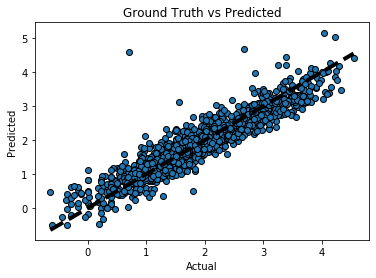

In [59]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [60]:
print("Our model has achieved this score : ",model_score) 
print("1 is the perfect score, and our model has got the test variance value : %.2f" % r2_score(y_test_set, y_predicted))

Our model has achieved this score :  0.8805479952112768
1 is the perfect score, and our model has got the test variance value : 0.86


<b>Intercept and coefficient values:

In [61]:
print("The intercept value of b0 : ", regressor.intercept_[0])

The intercept value of b0 :  1.8533145761186214


In [62]:
print("The coefficient values b1,b2,... : ", regressor.coef_)

The coefficient values b1,b2,... :  [[-0.0085294  -0.05511923  0.40147198 -0.00660216 -0.15464331 -0.14269188
  -0.02611848 -0.09430019  0.08283087  0.40728137 -0.00075348]]


In [63]:
regressor.coef_[0]

array([-0.0085294 , -0.05511923,  0.40147198, -0.00660216, -0.15464331,
       -0.14269188, -0.02611848, -0.09430019,  0.08283087,  0.40728137,
       -0.00075348])

In [64]:
import numpy as np
arr=regressor.coef_[0]
new=list()
for i in arr:
    new.append(i)

In [65]:
#array=pd.Series(regressor.coef_)
data={'Inputs':['Name','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'],'Coefficients':new}
coefficients=pd.DataFrame(data)
coefficients

,Inputs,Coefficients
0,Name,-0.008529
1,Location,-0.055119
2,Year,0.401472
3,Kilometers_Driven,-0.006602
4,Fuel_Type,-0.154643
5,Transmission,-0.142692
6,Owner_Type,-0.026118
7,Mileage,-0.094300
8,Engine,0.082831
9,Power,0.407281


In [66]:
y_predicted[1]


array([2.52633821])

In [67]:
predict_a = pd.DataFrame({'Actual': list(y_test_set), 'Predicted': list(y_predicted)})
predict_a['Actual'][0]

array([3.4339872])

In [68]:
actual=list()
predict=list()
for i in predict_a['Actual']:
    actual.append(i[0])
for i in predict_a['Predicted']:
    predict.append(i[0])


In [69]:
data1=list()
data2=list()
for i in actual:
    a=np.exp(i)
    data1.append(a)
for i in predict:
    a=np.exp(i)
    data2.append(a)
predict_a_0=pd.DataFrame({'Actual': data1, 'Predicted': data2})
predict_a_top=predict_a_0.tail(25)

<b>An example of the actual and predicted values of price:

In [70]:
predict_a_top

,Actual,Predicted
1737,2.25,1.576228
1738,7.40,8.035996
1739,1.99,2.486475
1740,5.20,5.000307
1741,13.19,12.072634
1742,7.99,5.796369
1743,5.50,5.245166
1744,4.75,5.311481
1745,4.75,5.332857
1746,4.65,5.657081


<b>Bar Graph:

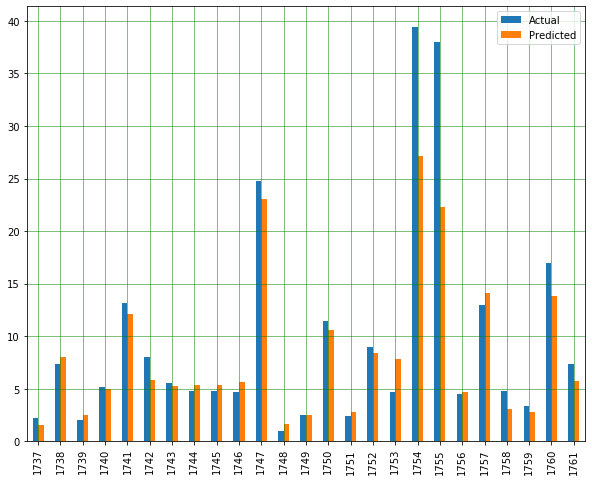

In [71]:
predict_a_top.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<b>Calculation of error:

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_set, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_set, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_set, y_predicted)))

Mean Absolute Error: 0.23468246014060673
Mean Squared Error: 0.10140053120305657
Root Mean Squared Error: 0.3184345006481813


<b>Prediction of the Price of the test data:

In [87]:
b_predicted =regressor.predict(b)

In [74]:
b_predicted

array([[1.35671244],
       [0.77596795],
       [2.74250262],
       ...,
       [1.1675175 ],
       [1.55439522],
       [2.9327438 ]])

In [75]:
b_test=list()
for i in b_predicted:
    b_test.append(i[0])

In [76]:
final_price=list();
for i in b_test:
    a=np.exp(i)
    final_price.append(a)
print("The final price predicted for the test data that is provided is : ")
final_price

The final price predicted for the test data that is provided is : 


[3.883405357662012,
 2.1726941784535385,
 15.52579161114628,
 3.743862858287024,
 12.597564083254392,
 20.95843891246797,
 2.536655177338359,
 3.3439520807948857,
 12.073897773446188,
 12.074309410704906,
 5.039311340568648,
 2.569317226059851,
 2.518848882126649,
 5.066710184623583,
 16.957943105985592,
 19.957268923570375,
 3.1052766279324087,
 9.215955665978491,
 4.725595491911111,
 5.389148863172036,
 2.3127444701527105,
 3.5893982521947034,
 4.6468293824627835,
 1.114439671467997,
 0.8597415137193026,
 5.495657541195271,
 9.103915944746113,
 2.4044789117632015,
 4.335539980473362,
 6.484780545915986,
 1.7670799463686335,
 7.871873873989783,
 4.931465254902844,
 4.846233918415308,
 9.896745960471966,
 8.469594063310913,
 4.552989311742322,
 12.377296925788515,
 7.740920686916073,
 13.74360754384504,
 11.106756330271706,
 8.578265062144304,
 7.078186282049512,
 5.6663100907108594,
 3.7740576960876795,
 14.667640327660358,
 9.01404181942885,
 19.53381270697439,
 4.644948252949912,
 5

In [77]:
final1=pandas.read_excel('Data_Test.xlsx')

In [78]:
final1=final1.drop(['New_Price'],axis=1)

In [79]:
import re
pattern = re.compile('^(\\S*)\\s')
new=final1['Mileage'].str.extract(pattern)
final1['Mileage'] = new
new=final1['Engine'].str.extract(pattern)
final1['Engine'] = new
new=final1['Power'].str.extract(pattern)
final1['Power'] = new

In [80]:
final1=final1.dropna()

In [81]:
final1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,null,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0


In [82]:
final1[~final1.Power.str.contains("null", na=False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0,2179,140,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0


In [83]:
searchfor = ['null']
final1 = final1[~final1.Power.str.contains('|'.join(searchfor))]

In [84]:
final1['Price']=final_price

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<b><h1>THE FINAL PREDICTED PRICE OF THE TEST DATA

In [88]:
final1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0,3.883405
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0,2.172694
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0,15.525792
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0,3.743863
5,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0,2179,140,7.0,12.597564
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,4.306042
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,6.849373
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,3.214004
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,4.732224


In [86]:
final1.to_excel('ML-DEC-MAJOREXCEL.xlsx')

<B>WORK DONE BY:
    <UL>
        <LI>RITWIKA PAL
        <LI>KAVYA KUSHWAHA
        <LI>NEELKANTH SINGH
        <LI>SAGNIK MAJUMDER
     </UL>
MACHINE LEARNING BATCH-1(DEC'19-JAN'20)</B><br>
This project is solely done by the names mentioned.<br>
Group-B10